In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

**Importation et extraction des données**

In [178]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

In [179]:
house_data = pd.read_csv("ParisHousing.csv")

In [180]:
house_data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [181]:
house_data.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


#  Exploratory Data Analysis

## Objectif :
- Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)
- Développer une premiere stratégie de modélisation 

#### Analyse de Forme :
- **variable target** : price
- **lignes et colonnes** : 10000, 17
- **types de variables** : qualitatives : 5, quantitatives : 12
- **Analyse des valeurs manquantes** : Aucune valeur manquante


In [182]:
house_data.shape #lignes et colonnes

(10000, 17)

In [183]:
# types de variables
nbrOfQualitativeVariables = 0
for c in house_data.columns:
    if (house_data[c].dtype == np.object0) | (house_data[c].dtype == np.object_): 
        nbrOfQualitativeVariables = nbrOfQualitativeVariables + 1
        continue
    data = house_data[(house_data.loc[:,c] != 0) & (house_data.loc[:,c] != 1)]
    if data.shape[0] == 0 :
        nbrOfQualitativeVariables = nbrOfQualitativeVariables + 1
print('La nombre des variables qualitatives : ',nbrOfQualitativeVariables,'\n La nombre des variables quantitatives : ',house_data.shape[1]-nbrOfQualitativeVariables)

La nombre des variables qualitatives :  5 
 La nombre des variables quantitatives :  12


In [184]:
house_data.isna().sum().sum()

0

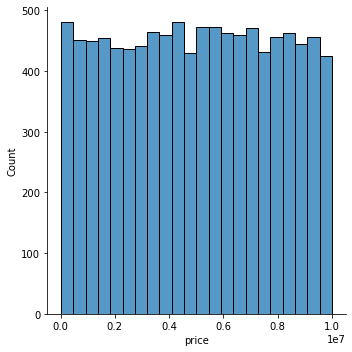

In [185]:
sns.displot(house_data['price'])

# **Training a Linear Regression Model**
## X and y List

In [186]:
X = house_data.drop('price',axis=1)

Y = house_data.drop(X.columns,axis=1)
X.shape

(10000, 16)

**Split Data into Train, Test** 


train_test_split divise notre dataset en sous-ensembles de train et de test aléatoires. 

Note: chaque fois que la cellule est executée, des données différentes sont générer donc on affecte une valeur à random_state pour reproduire le meme résultat à chaque fois.

In [187]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101) 

## Creating and Training the LinearRegression Model

In [188]:
lr = LinearRegression()

In [189]:
lr.fit(X_train,Y_train)

LinearRegression()

## Predictions from our Linear Regression Model

In [190]:
predictions = lr.predict(X_test)

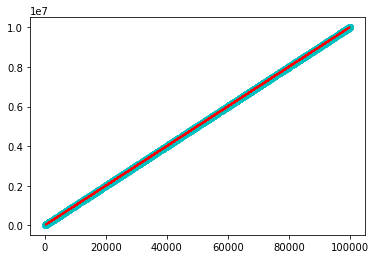

In [191]:
plt.scatter(X_test.iloc[:,0],Y_test,c='c')
plt.plot(X_test.iloc[:,0],predictions,c='r')

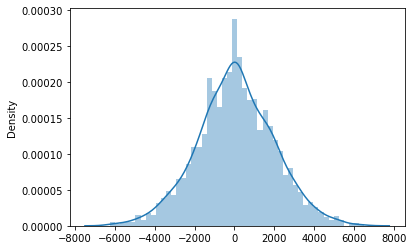

In [194]:
sns.distplot((Y_test-predictions),bins=50);

We notice that in the histogram above, the data is normally distributed, which means that our model made good predictions.

## Regression Evaluation Metrics

In [137]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 1497.9163536654803
MSE: 3685439.0612542643
RMSE: 1919.7497392249502
